# Lab Customer Analysis

## Show the dataframe shape

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
import math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Reading data
data= pd.read_csv('marketing_customer_analysis.csv')
print('The dataframe has', data.shape[0],'rows and', data.shape[1],'columns.')

The dataframe has 9134 rows and 24 columns.


## Standardize header names

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#Showing columns names
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
#After checking the columns' names, we have decided to lower case all the columns in order to have a more normalized df
data.columns= data.columns.str.lower()

In [6]:
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [7]:
#Adding a space in "Employment Status"
data = data.rename(columns = {'employmentstatus': 'employment status'})
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Check numerical columns

In [8]:
data_num = data.select_dtypes(include=np.number)
data_num=pd.DataFrame(data_num.dtypes)
data_num

,0
customer lifetime value,float64
income,int64
monthly premium auto,int64
months since last claim,int64
months since policy inception,int64
number of open complaints,int64
number of policies,int64
total claim amount,float64


## Check Categorical columns

In [9]:
data_cat = data.select_dtypes(include=np.object)
data_cat=pd.DataFrame(data_cat.dtypes)
data_cat

,0
customer,object
state,object
response,object
coverage,object
education,object
effective to date,object
employment status,object
gender,object
location code,object
marital status,object


## Check and deal with missing values

In [10]:
# Check if there are NaN values
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [11]:
check_null = sum(data.isna().sum())
print('The total number of null values in the dataframe is', check_null)

The total number of null values in the dataframe is 0


## Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter (Jan, Feb and March)

In [12]:
data['starting month of subscription'] = data['effective to date'].astype(str).str[0]

In [13]:
data['starting month of subscription'].replace('1', 'January',inplace=True)
data['starting month of subscription'].replace('2', 'February',inplace=True)

In [14]:
#reorganizing columns
data= data[['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date','starting month of subscription', 'employment status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel',
       'vehicle class', 'vehicle size','total claim amount']]

In [15]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,starting month of subscription,employment status,gender,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,total claim amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,February,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,January,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,February,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,January,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,February,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879


## Describe the Dataset

In [16]:
data.describe()
##If we check the 'income' column, we will noticed that there are many rows with 0 income. We can decide to drop those or to replace them 0 with the mean for example, but we will keep this decision for later.

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Show a plot of the total number of responses

Text(0.5, 1.0, 'Total number of responses')

Text(0, 0.5, 'Number of responses')

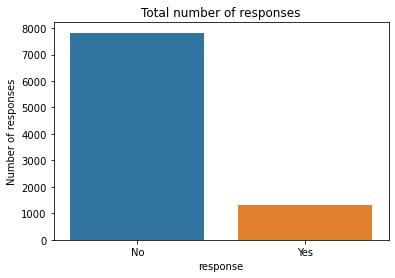

In [17]:
#in order to visualize the amount of people who responded, we have decided to plot responde rate
ax = sns.countplot(x="response", data=data)
plt.title('Total number of responses')
plt.ylabel('Number of responses')
plt.show()

## Show a plot of the response rate by the sales channel

Text(0.5, 1.0, 'Response Rate by the Sales Channel')

Text(0, 0.5, 'number of responses')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agent'),
  Text(1, 0, 'Call Center'),
  Text(2, 0, 'Web'),
  Text(3, 0, 'Branch')])

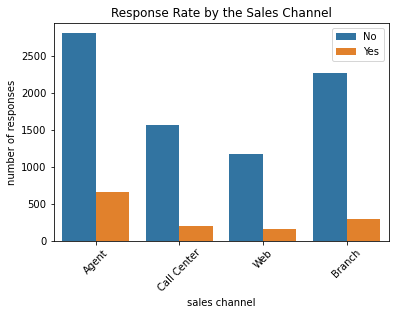

In [18]:
ax2= sns.countplot(x='sales channel', data=data,hue='response')
plt.title('Response Rate by the Sales Channel')
plt.ylabel('number of responses')
plt.xticks(rotation=45)
ax2.legend()
plt.show()

## Show a plot of the response rate by the total claim amount

Text(0.5, 1.0, 'Response rate by total claim amount')

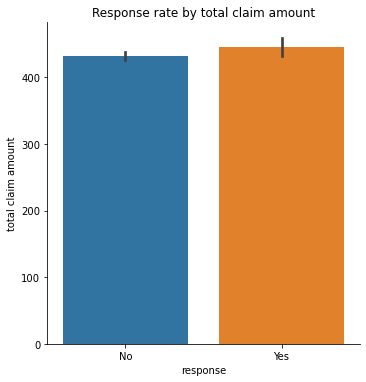

In [19]:
ax3= sns.catplot(x='response', y= 'total claim amount', data=data, kind='bar')
plt.title('Response rate by total claim amount')
plt.show()

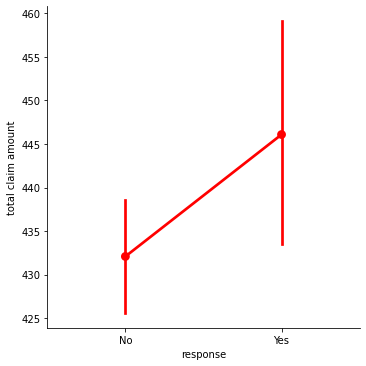

In [20]:
ax4= sns.catplot(x='response', y= 'total claim amount', data=data, kind='point',color='red')
plt.show()

## Show a plot of the response rate by income

Text(0.5, 1.0, 'Response rate by income')

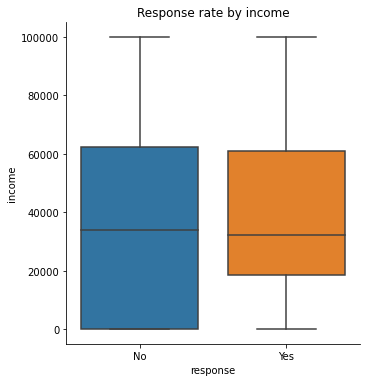

In [21]:
ax5= sns.catplot(x='response',y='income',kind='box',data=data)
plt.title('Response rate by income')
plt.show()